## Lab Assignment 5

- 1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv
dataset.
- 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given
dataset.

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv("Social_Network_Ads.csv")

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info() # View non-null count and dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# Drop User ID
df.drop("User ID", axis=1, inplace=True)

#Encode Gender
df["Gender"] = df["Gender"].astype("category").cat.codes  # Male=1, Female=0

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [13]:
# Define features and target
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [17]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Output results
metrics_dict = {
    "True Negatives (TN)": tn,
    "False Positives (FP)": fp,
    "False Negatives (FN)": fn,
    "True Positives (TP)": tp,
    "Accuracy": accuracy,
    "Error Rate": error_rate,
    "Precision": precision,
    "Recall": recall
}

for key, value in metrics_dict.items(): print(f"{key:<25}: {value}")

True Negatives (TN)      : 50
False Positives (FP)     : 2
False Negatives (FN)     : 7
True Positives (TP)      : 21
Accuracy                 : 0.8875
Error Rate               : 0.11250000000000004
Precision                : 0.9130434782608695
Recall                   : 0.75


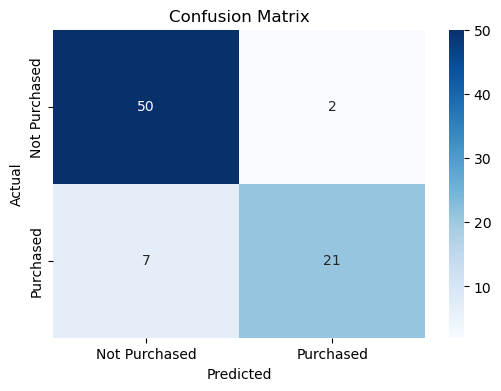

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Purchased", "Purchased"], 
            yticklabels=["Not Purchased", "Purchased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()